# Veri Görselleştirme

In [2]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df = planets.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [6]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


# Eksik Değerleri Giderme

In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [12]:
# df["columnd"] = df["column"].fillna(df.column.mean, inplace = True)

#### Sadece Kategorik Değişkenler ve Özetleri

In [13]:
kat_df = df.select_dtypes(include = ["category"])

In [14]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [15]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

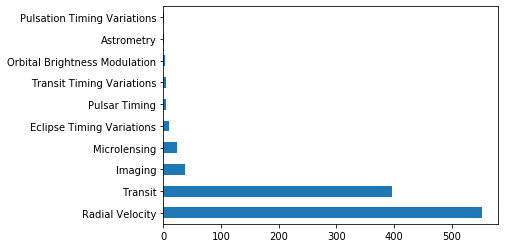

In [16]:
kat_df["method"].value_counts().plot.barh();

## Sürekli Değişken Özellikleri

In [17]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [18]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Dağılım Grafikleri

### Barplot

...

In [19]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [22]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [23]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [24]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [25]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [26]:
df.cut.astype(CategoricalDtype(ordered = True))

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [27]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [28]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [29]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [30]:
# barplot

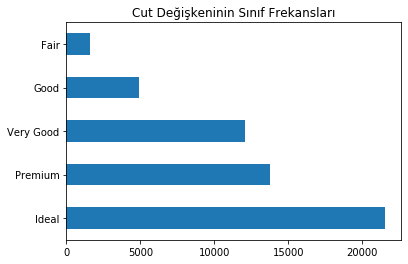

In [31]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

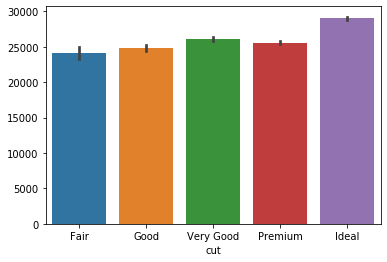

In [32]:
sns.barplot(x = "cut", y = df.cut.index , data =df);

## ÇAPRAZLAMA

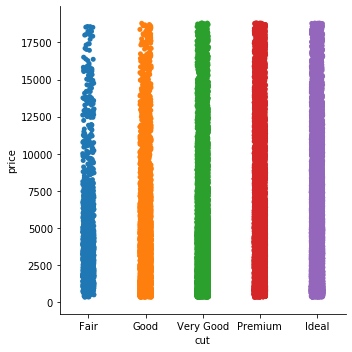

In [33]:
sns.catplot(x ="cut" , y = "price", data = df);

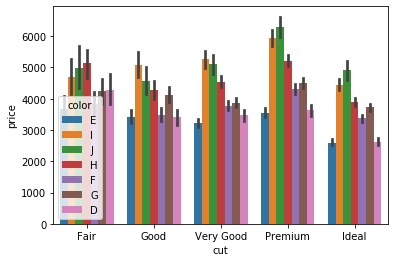

In [34]:
sns.barplot(x = "cut", y ="price", hue = "color", data =df);

In [35]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram ve Yoğunluk

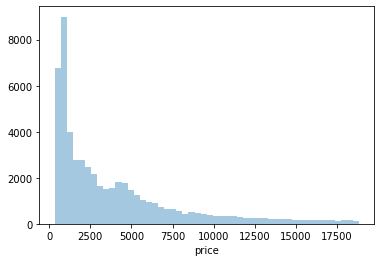

In [36]:
sns.distplot(df.price, kde = False);

In [37]:
?sns.distplot

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins. If unspecified, as reference rule is used
    that tries to find a useful default.
hist : bool, optional
    Whether

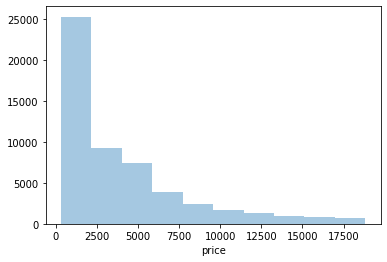

In [38]:
sns.distplot(df.price,bins = 10, kde = False);

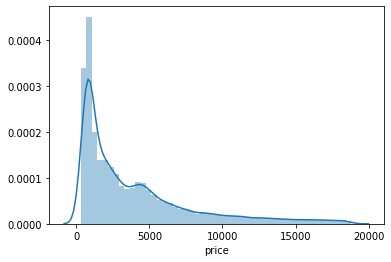

In [39]:
sns.distplot(df.price);

In [40]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

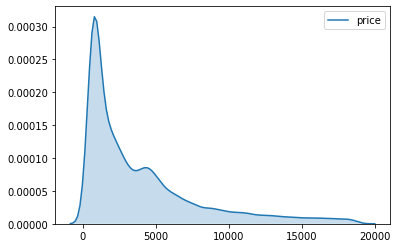

In [41]:
sns.kdeplot(df.price, shade = True);

## Çaprazlamalar

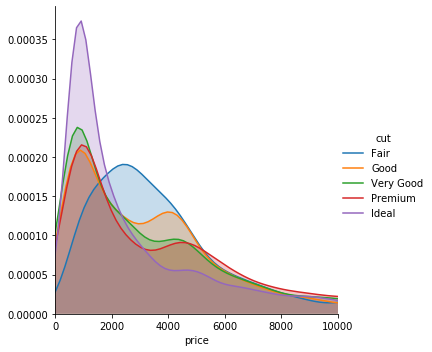

In [42]:
(sns
 .FacetGrid(df,
              hue ="cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

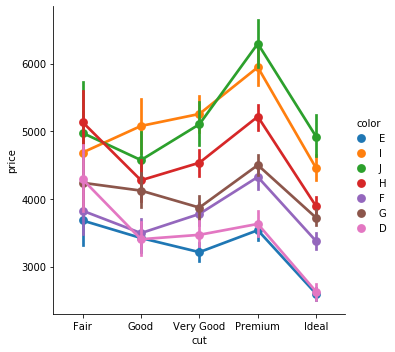

In [43]:
sns.catplot(x ="cut",  y ="price", hue = "color", kind = "point", data =df);

## Boxplot

In [44]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [46]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [47]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [48]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

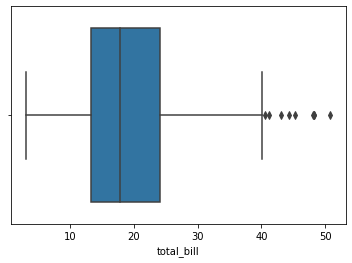

In [49]:
sns.boxplot(x = df["total_bill"]);

## ÇAPRAZLAMALAR

In [51]:
#Hangi günler daha fazla kazanıyoruz?

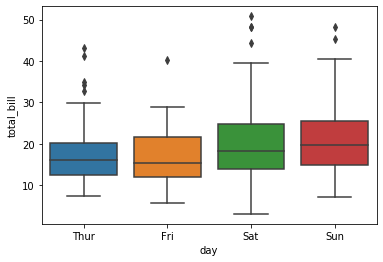

In [52]:
sns.boxplot(x = "day" , y ="total_bill", data = df);

In [53]:
#sabah mı akşam mı daha çok kazanıyoruz?

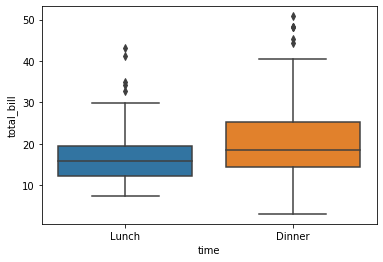

In [54]:
sns.boxplot(x = "time" , y ="total_bill", data = df);

In [55]:
#kişi sayısı kazanc

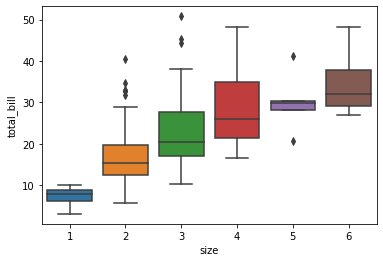

In [56]:
sns.boxplot(x ="size", y ="total_bill", data = df);

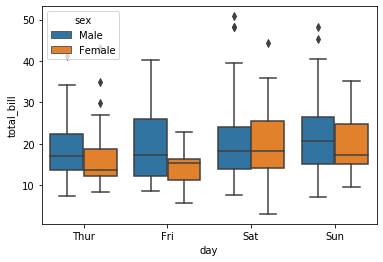

In [58]:
sns.boxplot(x = "day" , y ="total_bill", hue = "sex", data = df);

## Violin

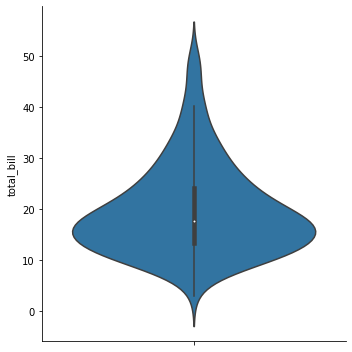

In [59]:
sns.catplot(y="total_bill", kind = "violin",data = df);

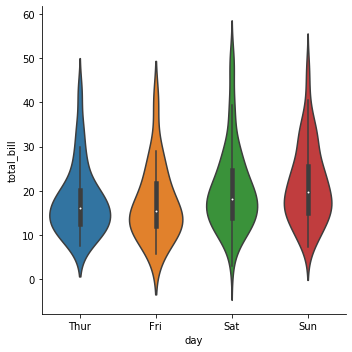

In [61]:
sns.catplot(x ="day",y = "total_bill", kind = "violin",data = df);

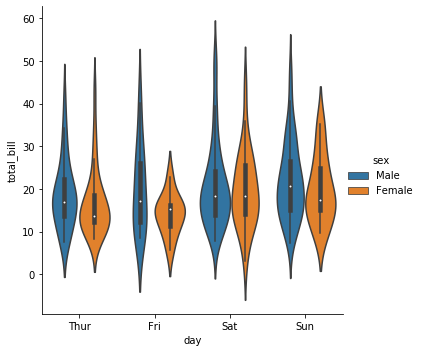

In [62]:
sns.catplot(x ="day",y = "total_bill", hue = "sex", kind = "violin",data = df);

## Korelasyon Grafikleri

#### Scatterplot

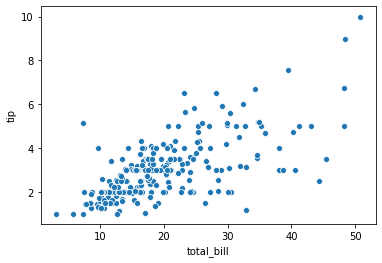

In [64]:
sns.scatterplot(x ="total_bill", y = "tip", data = df);

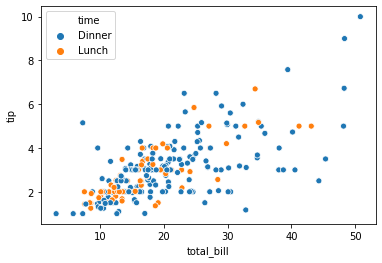

In [66]:
sns.scatterplot(x ="total_bill", y = "tip",hue = "time", data = df);

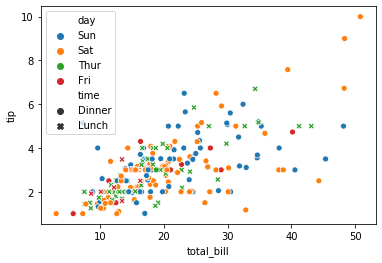

In [70]:
sns.scatterplot(x ="total_bill", y = "tip",hue ="day" , style ="time", data = df);

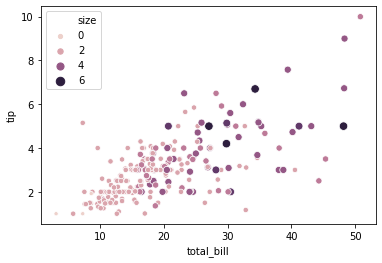

In [72]:
sns.scatterplot(x ="total_bill", y = "tip",size ="size",hue = "size", data = df);

#### Doğrusal İlişkinin Gösterilmesi

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

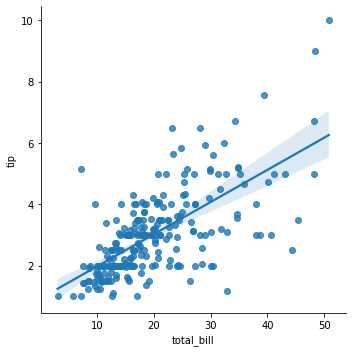

In [74]:
sns.lmplot(x = "total_bill", y ="tip", data = df);

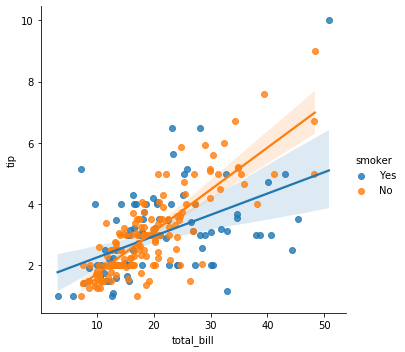

In [75]:
sns.lmplot(x = "total_bill", y ="tip",hue = "smoker", data = df);

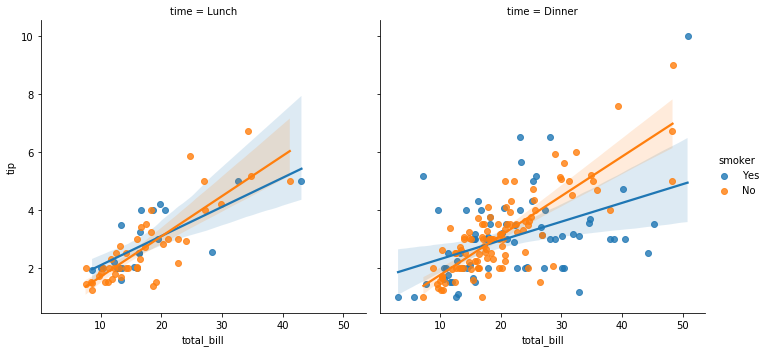

In [76]:
sns.lmplot(x = "total_bill", y ="tip",hue = "smoker",col = "time",data = df);

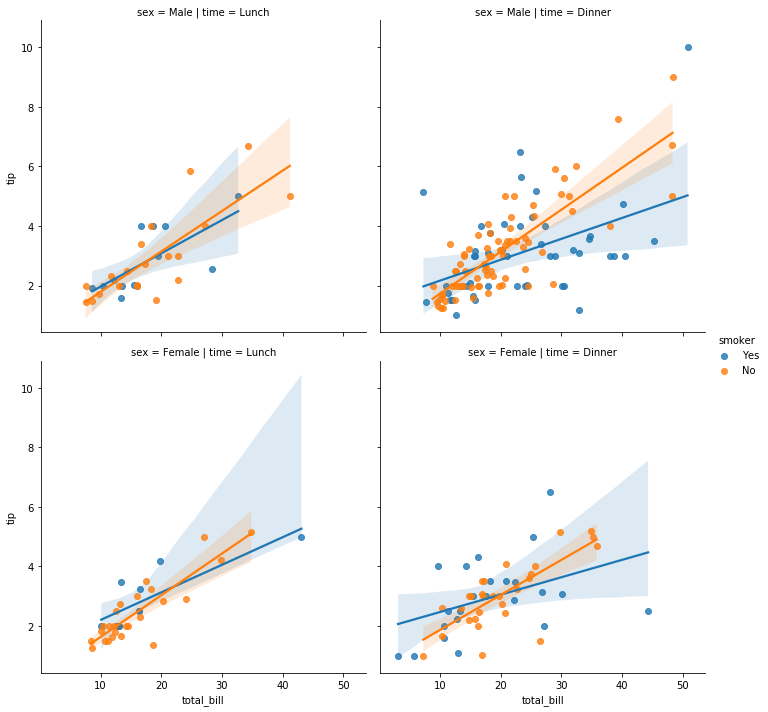

In [78]:
sns.lmplot(x = "total_bill", y ="tip",hue = "smoker",col = "time",row = "sex", data = df);

### ScatterPlot

In [79]:
import seaborn as sns;
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [82]:
df.shape

(150, 5)

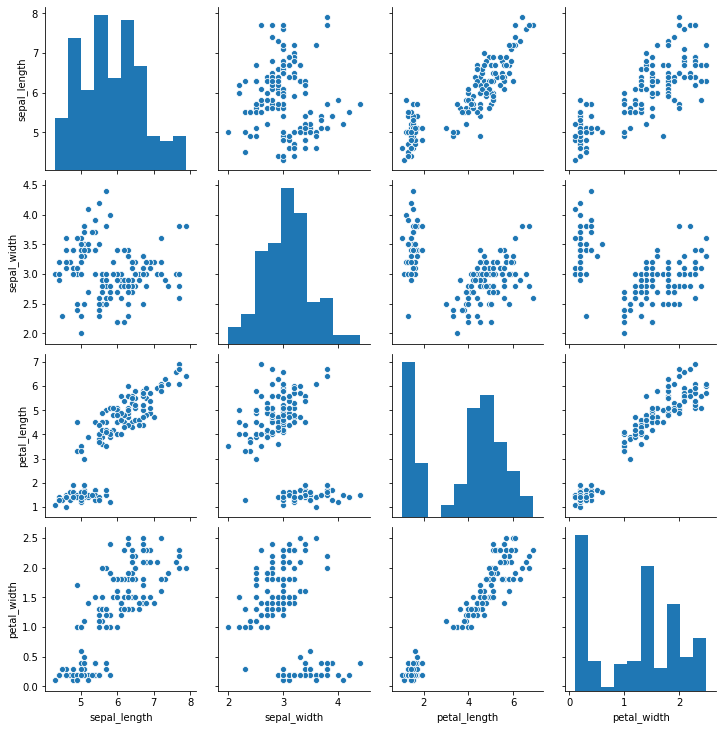

In [83]:
sns.pairplot(df);

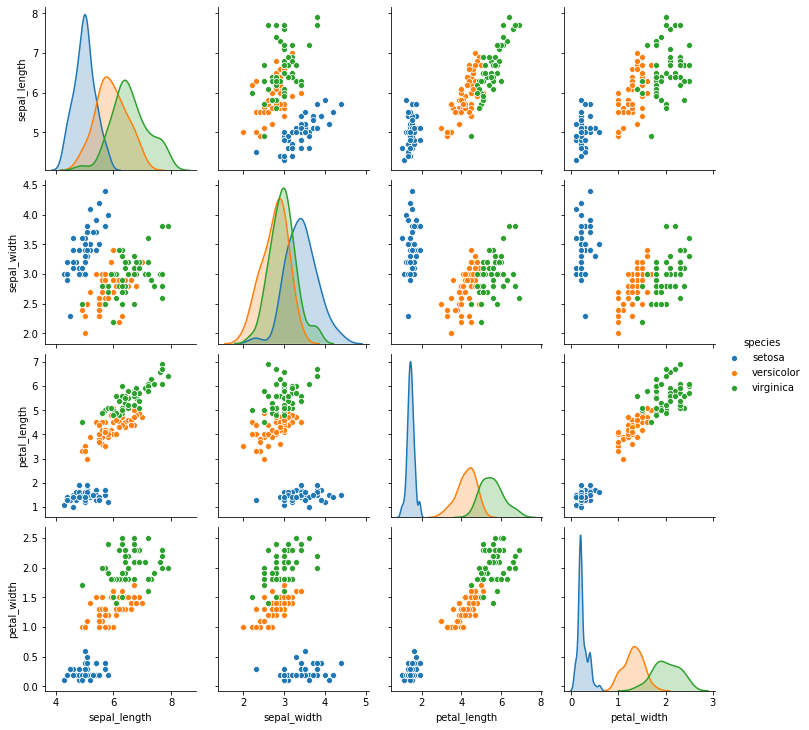

In [84]:
sns.pairplot(df, hue ="species");

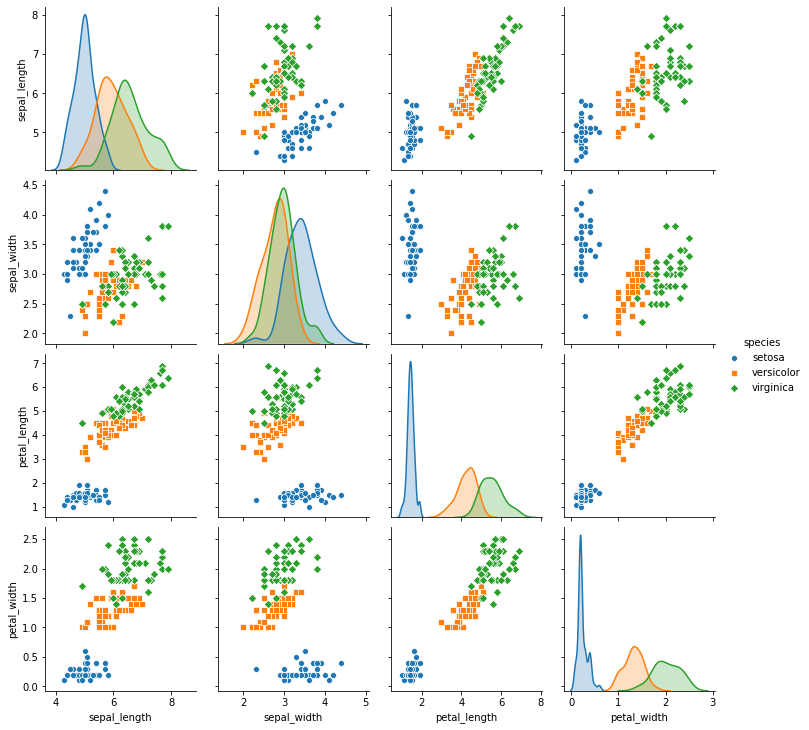

In [87]:
sns.pairplot(df, hue ="species", markers = ["o","s","D"]);

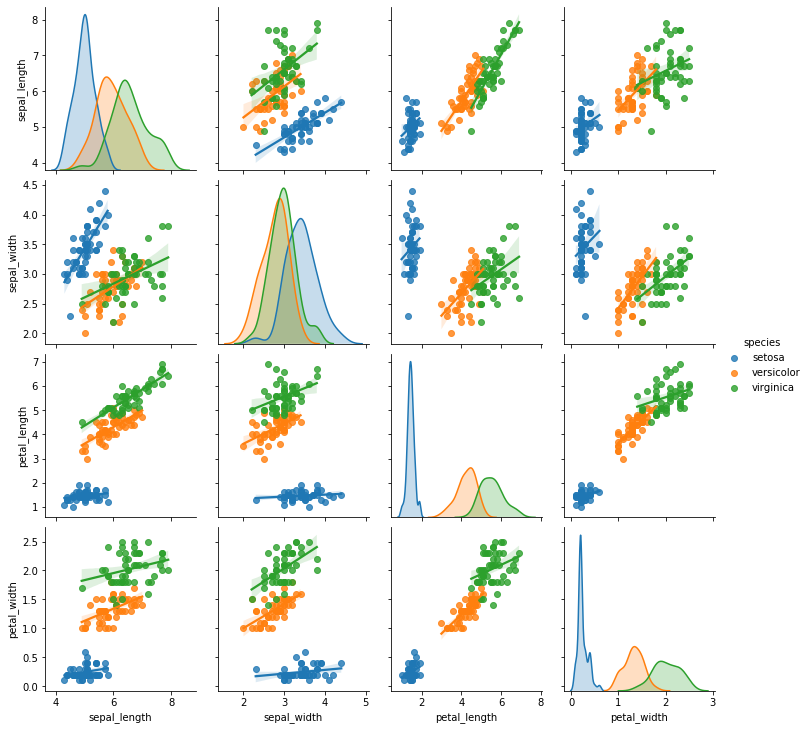

In [90]:
sns.pairplot(df , kind = "reg", hue = "species");

## Heatmap

#### Veri Setinin Hikayesi

In [92]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [93]:
df.shape

(144, 3)

In [95]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [103]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


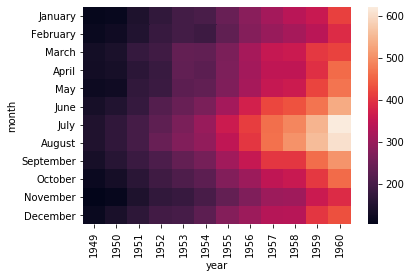

In [104]:
sns.heatmap(df);

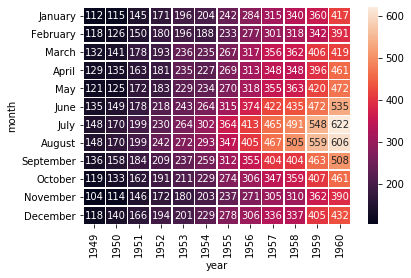

In [105]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

### Çizgi Grafik

In [107]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [108]:
df.shape

(1064, 5)

In [109]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [110]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [111]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [113]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [114]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


### Çizgi Grafik ve Çaprazlamalar

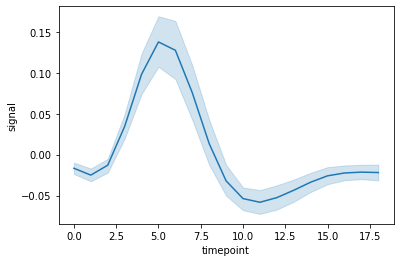

In [115]:
sns.lineplot(x = "timepoint", y ="signal" , data = df);

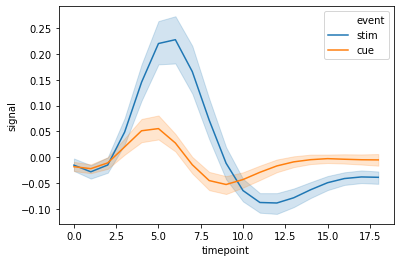

In [116]:
sns.lineplot(x = "timepoint", y ="signal" ,hue ="event", data = df);

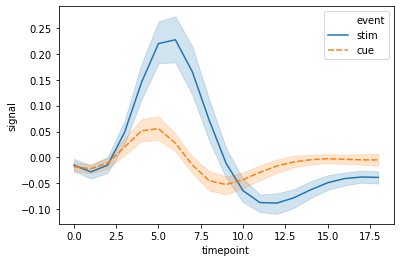

In [120]:
sns.lineplot(x = "timepoint", y ="signal" ,hue ="event",style = "event", data = df);

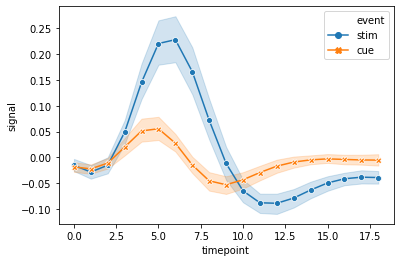

In [122]:
sns.lineplot(x = "timepoint", 
             y ="signal" ,
             hue ="event",
             style ="event",
             markers = True , dashes = False,
             data = df);

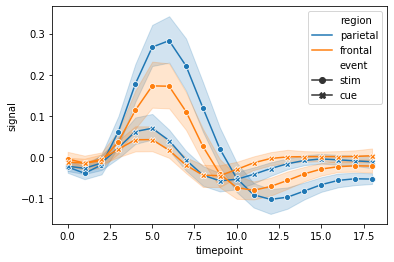

In [123]:
sns.lineplot(x = "timepoint", 
             y ="signal" ,
             hue ="region",
             style ="event",
             markers = True , dashes = False,
             data = df);

### Basit Zaman Serisi Grafiği

In [124]:
!pip install pandas_datareader
import pandas_datareader as pr

In [125]:
df = pr.get_data_yahoo("AAPL", start = " 2016-01-01", end = "2019-08-25")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.443037
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.830513
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.364161
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.378082
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.496408


In [126]:
df.shape

(917, 6)

In [127]:
kapanis = df["Close"]

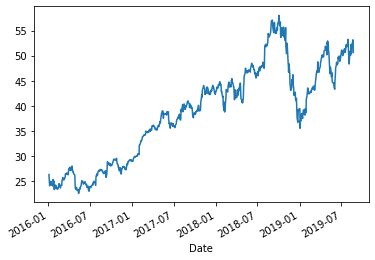

In [128]:
kapanis.plot();

In [ ]:
aa